In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# in this implementation we are removing name, ticket and cabin 

def pre_process(df):
    df = df.drop(columns=['Name','Ticket'])

    # replace male and female to 0 and 1
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female',1, inplace=True)

    # remove nan and replace strings to integers for Embarked
    df['Embarked'].replace('S', 0, inplace=True)
    df['Embarked'].replace('C', 1, inplace=True)
    df['Embarked'].replace('Q', 2, inplace=True)
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].median()).astype(int)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    # keep the letters from the cabin and convert them to integers

    def process_cabin(x):
        if type(x) == str:
            return ['C','E','G','D','A','B','F','T'].index(x[0]) + 1
        else:
            return 0


    df['Cabin'] = df['Cabin'].apply(lambda x: process_cabin(x))
    df = df.set_index('PassengerId')
    return df

df = pre_process(df)

In [3]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0
2,1,1,1,38.0,1,0,71.2833,1,1
3,1,3,1,26.0,0,0,7.9250,0,0
4,1,1,1,35.0,1,0,53.1000,1,0
5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0,0
888,1,1,1,19.0,0,0,30.0000,6,0
889,0,3,1,28.0,1,2,23.4500,0,0


The data is converted to x and y

In [4]:
y = df.pop('Survived')
x = df

In [5]:
from sklearn.tree import DecisionTreeClassifier

# create a decision tree classifier
model = DecisionTreeClassifier()
# fit the decision tree model with the data
model.fit(x,y)

# find important features of the decision tree
importance = model.feature_importances_

In [6]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Feature: Pclass, Score: 0.08319
Feature: Sex, Score: 0.30804
Feature: Age, Score: 0.25220
Feature: SibSp, Score: 0.03183
Feature: Parch, Score: 0.02506
Feature: Fare, Score: 0.23527
Feature: Cabin, Score: 0.05022
Feature: Embarked, Score: 0.01419


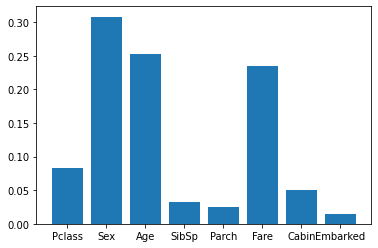

In [7]:
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))
    
plt.bar(x.columns, importance)
plt.show()


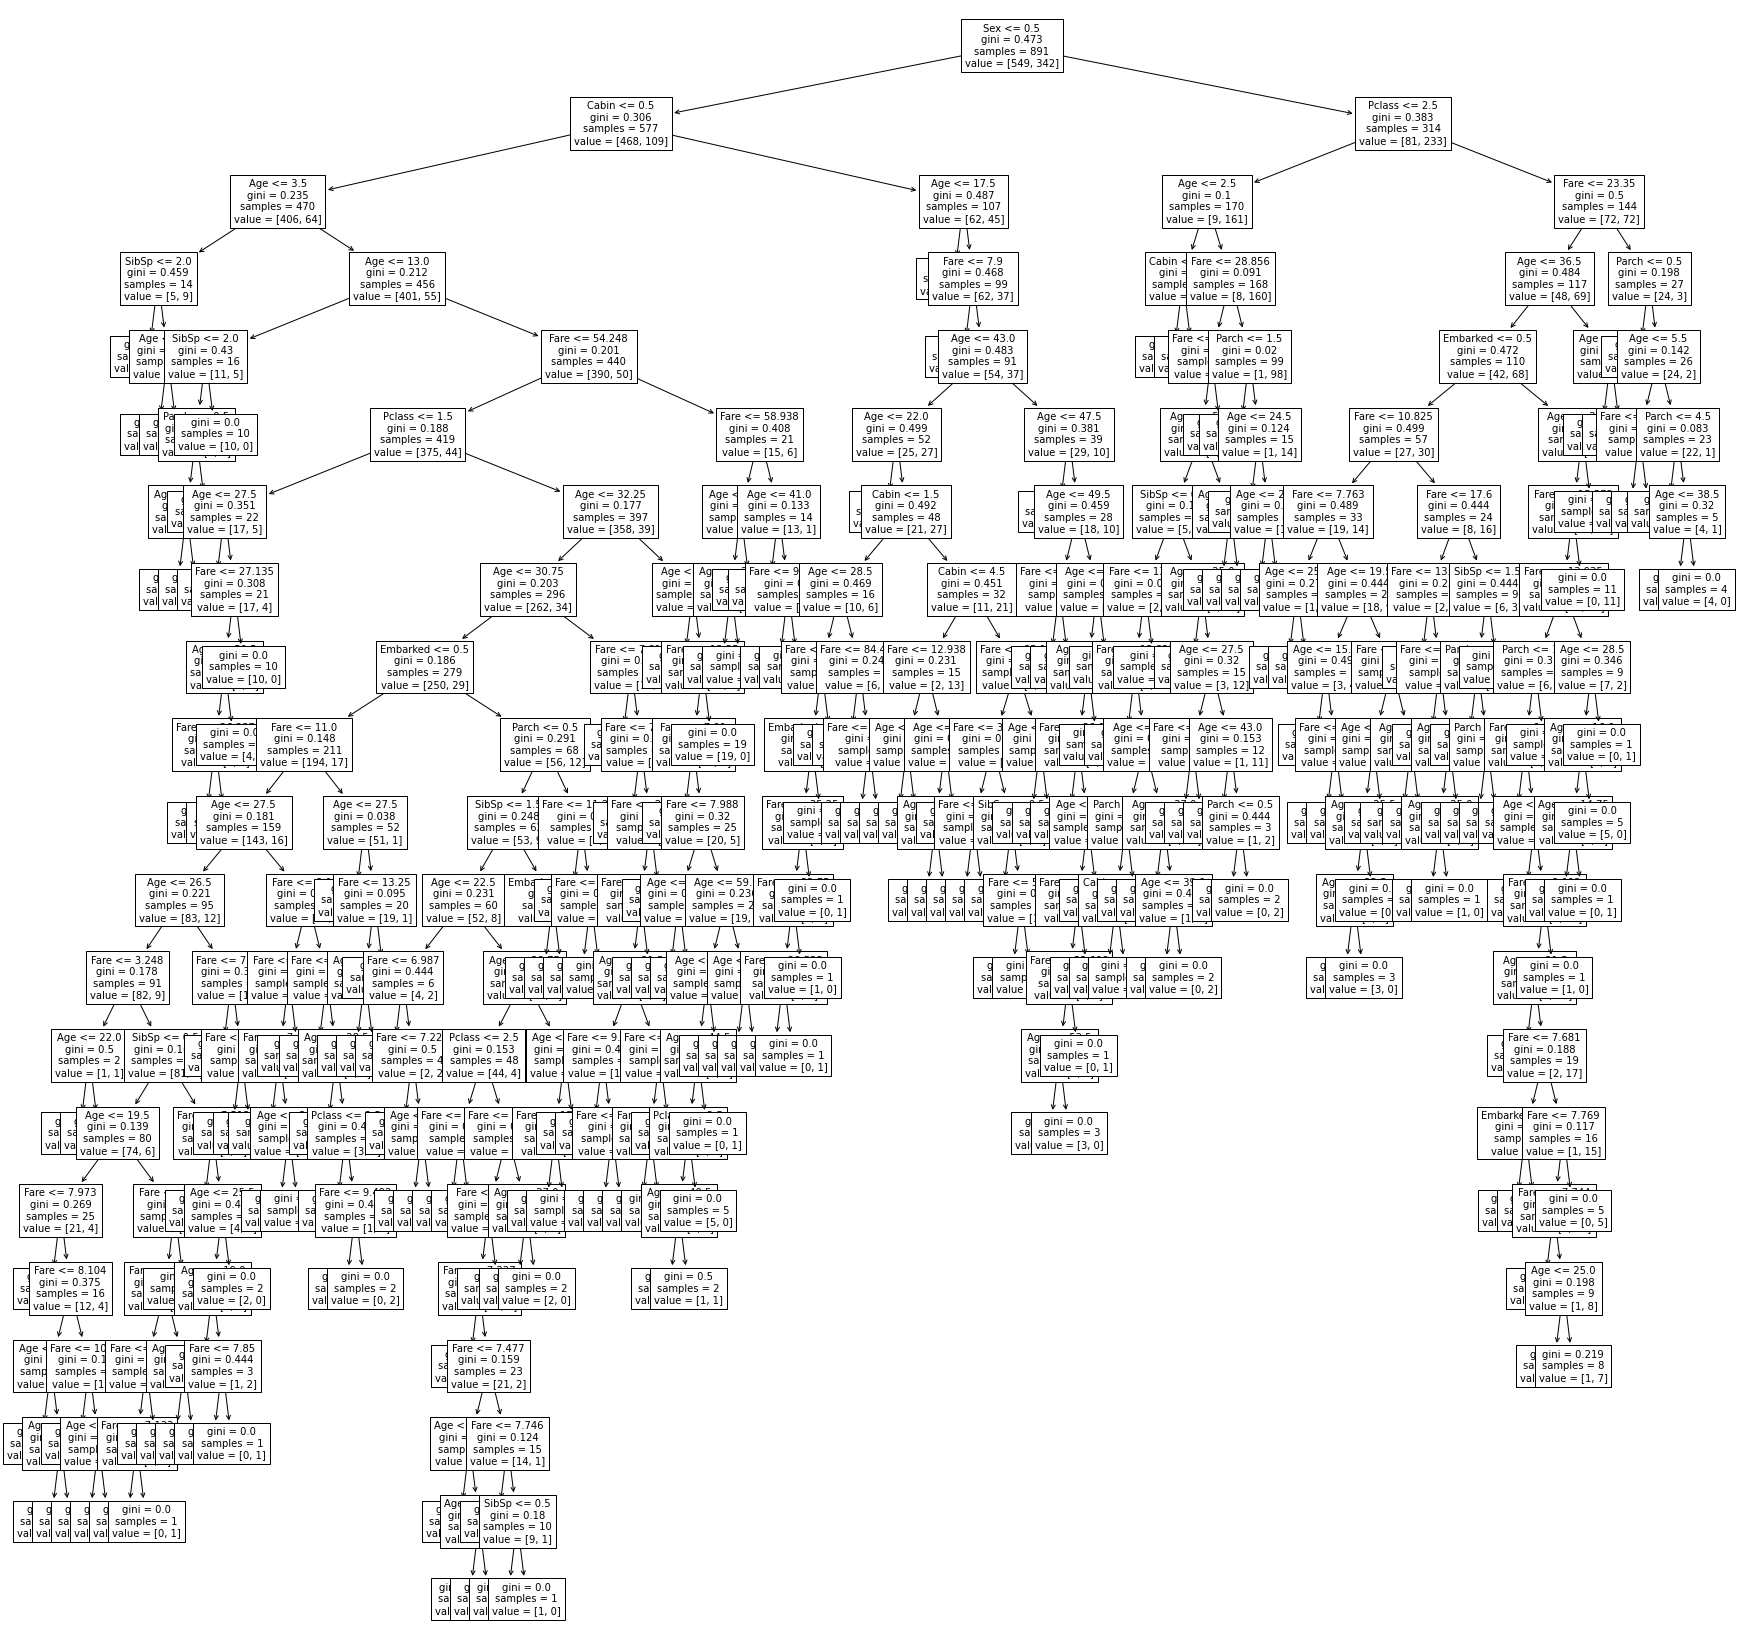

In [8]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30,30))
plot_tree(model, ax=ax, fontsize=10, feature_names=x.columns)
plt.show()

Find cross validation scores of the decision tree

In [9]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(model, x, y, cv=5)
# cross validation scores
np.average(dt_scores)

0.8002761910740066

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x,y)

RandomForestClassifier()

In [11]:
rf_scores = cross_val_score(rf_model, x, y, cv=5)
np.average(rf_scores)

0.8047266336074321